# Customer Churn Data Classification Project
Ashlynn Blanshan
### Why explore customer churn?
Customer churn is the measurement of customers that stopped using a company's product or service. This is important to businesses because customer churn can decrease profits and overall growth in the business. In order to figure out customer churn, it is important to find potential causes so that the business can find ways to slow the rate of customer churn. This is where data science is needed. Utilizing data science can help discover the features that is causing customer churn by looking at existing data. Taking note of these features, data scientists can create machine learning models in order to predict customer churn. This is useful because businesses can leverage these models for making data driven decisions and optimize their growth.

### What I Accomplished
Using customer churn data, I was able to explore ways features affect customer churn such as age, tenure, and salary. I explored the drivers of churn, trained Logistic Regression, Random Forest, and XGBoost models, and achieved an accuracy of ~86%. From the models, I was able to identify key contributers to customer churn such as age, number of products and bank account balance. 

## Import the data
Here I am importing the data, cleaning it, and identifying variables which is necessary for exploratory data analysis.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("/home/blansha2/Machine_Learning/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [32]:
print("\nMissing Values:\n", df.isna().sum())
print("\nDescribing the Data\n", df.describe())


Missing Values:
 RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Describing the Data
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000 

In [33]:
#lets drop unnecessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [34]:
print("\nUnique Values for Geography\n", df['Geography'].unique())
print("\nUnique Values for Gender\n", df['Gender'].unique())
print("\nUnique Values for Card Type\n", df['Card Type'].unique())


Unique Values for Geography
 ['France' 'Spain' 'Germany']

Unique Values for Gender
 ['Female' 'Male']

Unique Values for Card Type
 ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


## Exploratory Data Analysis
Here is where I take the data and explore it utilizing charts and graphs. My main focus is on the 'Exited' column since it demonstrates customer churn. 

In [35]:
cont_df = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned' ]
binary_df = ['HasCrCard', 'IsActiveMember', 'Complain']
categor_df = ['Geography', 'Gender', 'Card Type']
numcat_df = ['Tenure', 'NumOfProducts', 'Satisfaction Score']
target_df = ['Exited']

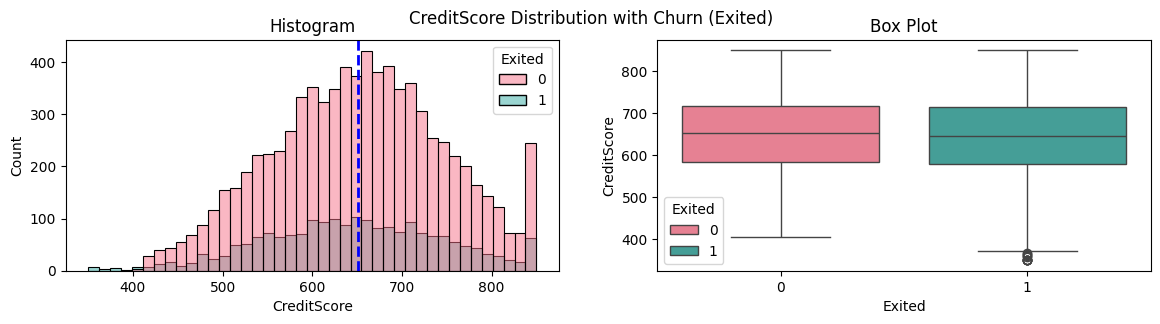

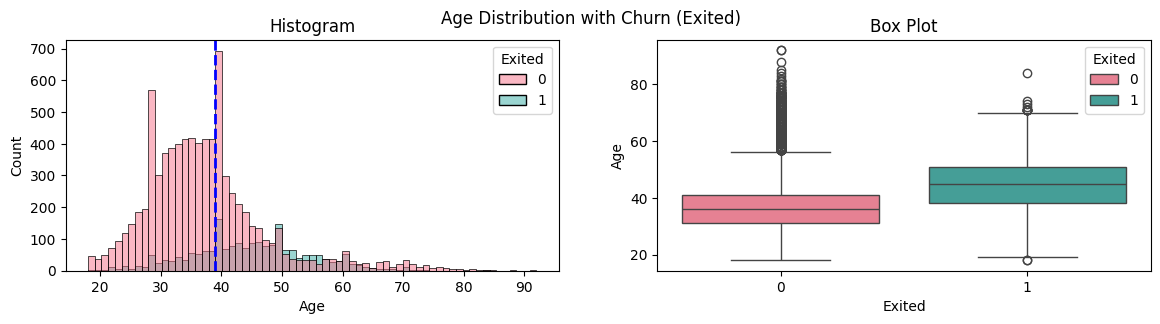

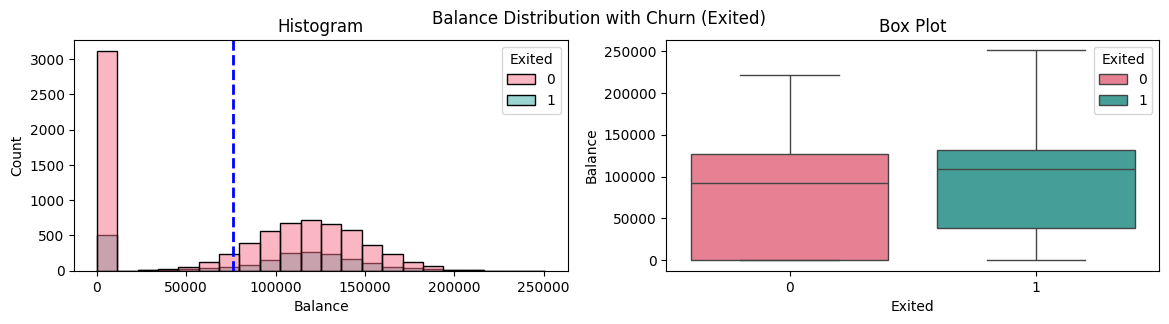

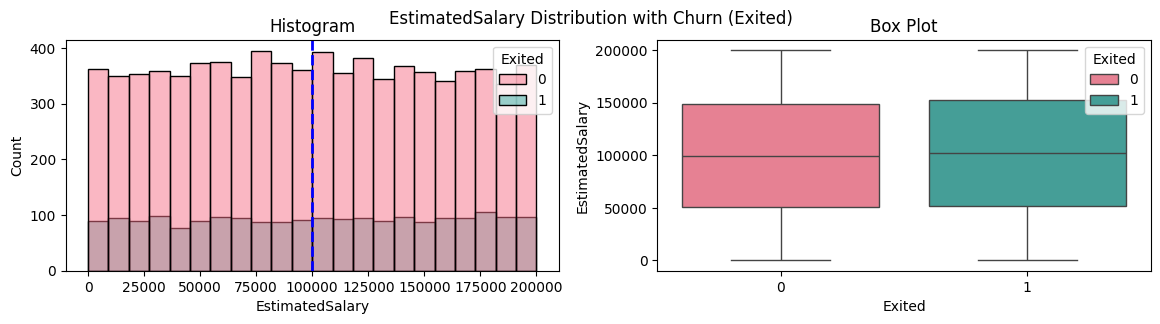

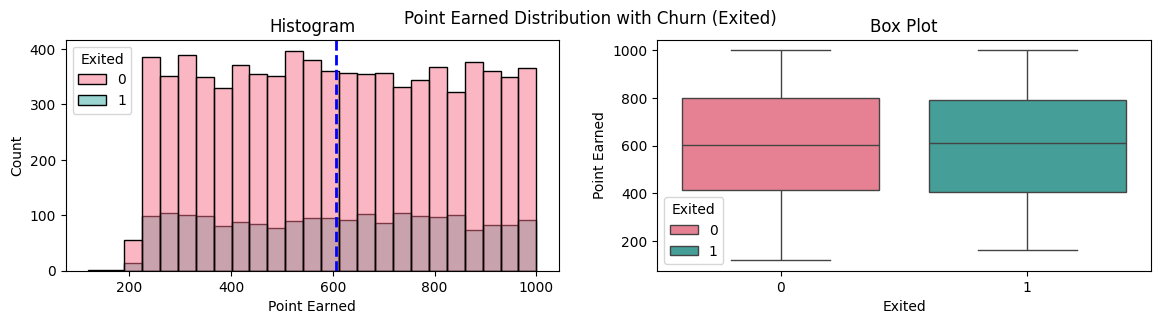

In [36]:
#sns.color_palette("rocket", as_cmap=True)

for col in cont_df:
    fig, axes = plt.subplots(1, 2, figsize=(14,3))
    fig.suptitle(f'{col} Distribution with Churn (Exited)')
    axes[0].set_title("Histogram")
    sns.histplot(x=df[col], ax=axes[0], hue=df["Exited"], palette='husl')
    axes[0].axvline(df[col].mean(), color='blue', linestyle='dashed', linewidth=2)
    axes[1].set_title("Box Plot")
    sns.boxplot(x=df['Exited'], y=df[col], ax=axes[1], hue=df["Exited"],palette="husl")
    
plt.show()
    

### Insights
Looking at this, we want to pay attention to Age and Balance. It seems like more older people have exited in comparison to people who didnt. Same with Balance, people who have a higher balance seems to have exited more. 

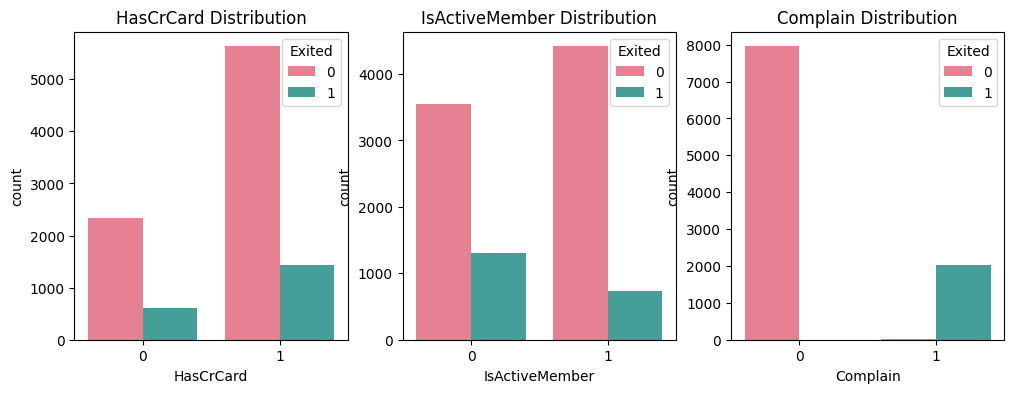

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for idx, col in enumerate(binary_df[:3]):  
    ax = axes[idx]
    sns.countplot(x=df[col], hue=df['Exited'], palette='husl', ax=ax)
    ax.set_title(f'{col} Distribution')
    ax

plt.show()


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701), (0.7757319041862729, 0.5784925270759935, 0.19475566538551875), (0.5105309046900421, 0.6614299289084904, 0.1930849118538962), (0.20433460114757862, 0.6863857739476534, 0.5407103379425205), (0.21662978923073606, 0.6676586160122123, 0.7318695594345369), (0.5049017849530067, 0.5909119231215284, 0.9584657252128558), (0.9587050080494409, 0.3662259565791742, 0.9231469575614251)]


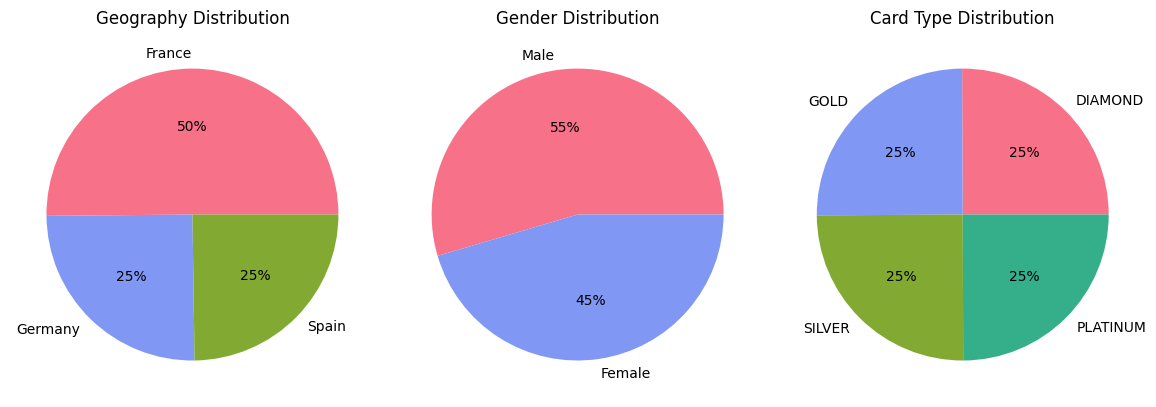

In [38]:
colors = sns.color_palette('husl', 7)
colors = list(colors)
print(colors)
colors[1] = (0.5049017849530067, 0.5909119231215284, 0.9584657252128558)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for idx, col in enumerate(categor_df[:3]):
    ax = axes[idx]
    counts = df[col].value_counts()
    labels = counts.index
    ax.pie(counts, labels=labels, colors=colors, autopct='%.0f%%')
    ax.set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

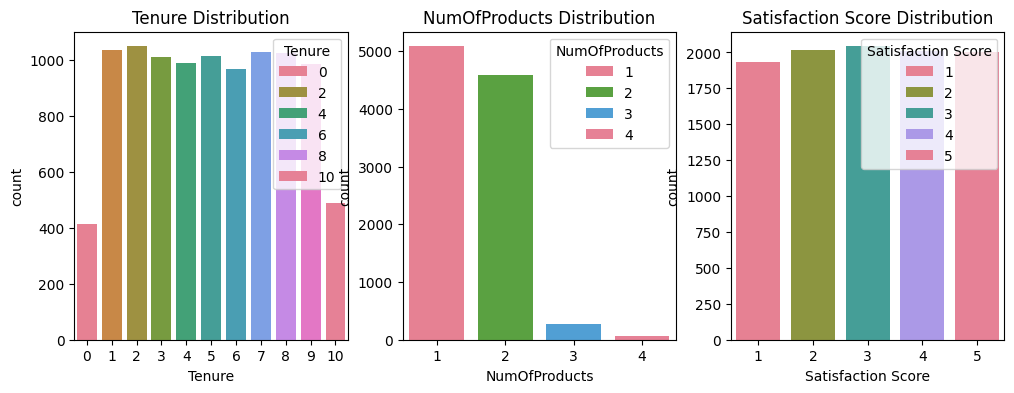

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for idx, col in enumerate(numcat_df[:3]):  
    ax = axes[idx]
    sns.countplot(x=df[col], hue=df[col], palette='husl', ax=ax)
    ax.set_title(f'{col} Distribution')
    ax

plt.show()

In [40]:
churn = (df['Exited'] == 1).sum()
n_churn = (df['Exited'] == 0).sum()

print("\nThis is the number of customer churn:\n",churn)
print("\nThis is the number of customers who still use the bank:\n",n_churn)

print("\nThis is the percent of customers who exited:\n", churn/n_churn*100,'%')


This is the number of customer churn:
 2038

This is the number of customers who still use the bank:
 7962

This is the percent of customers who exited:
 25.596583772921377 %


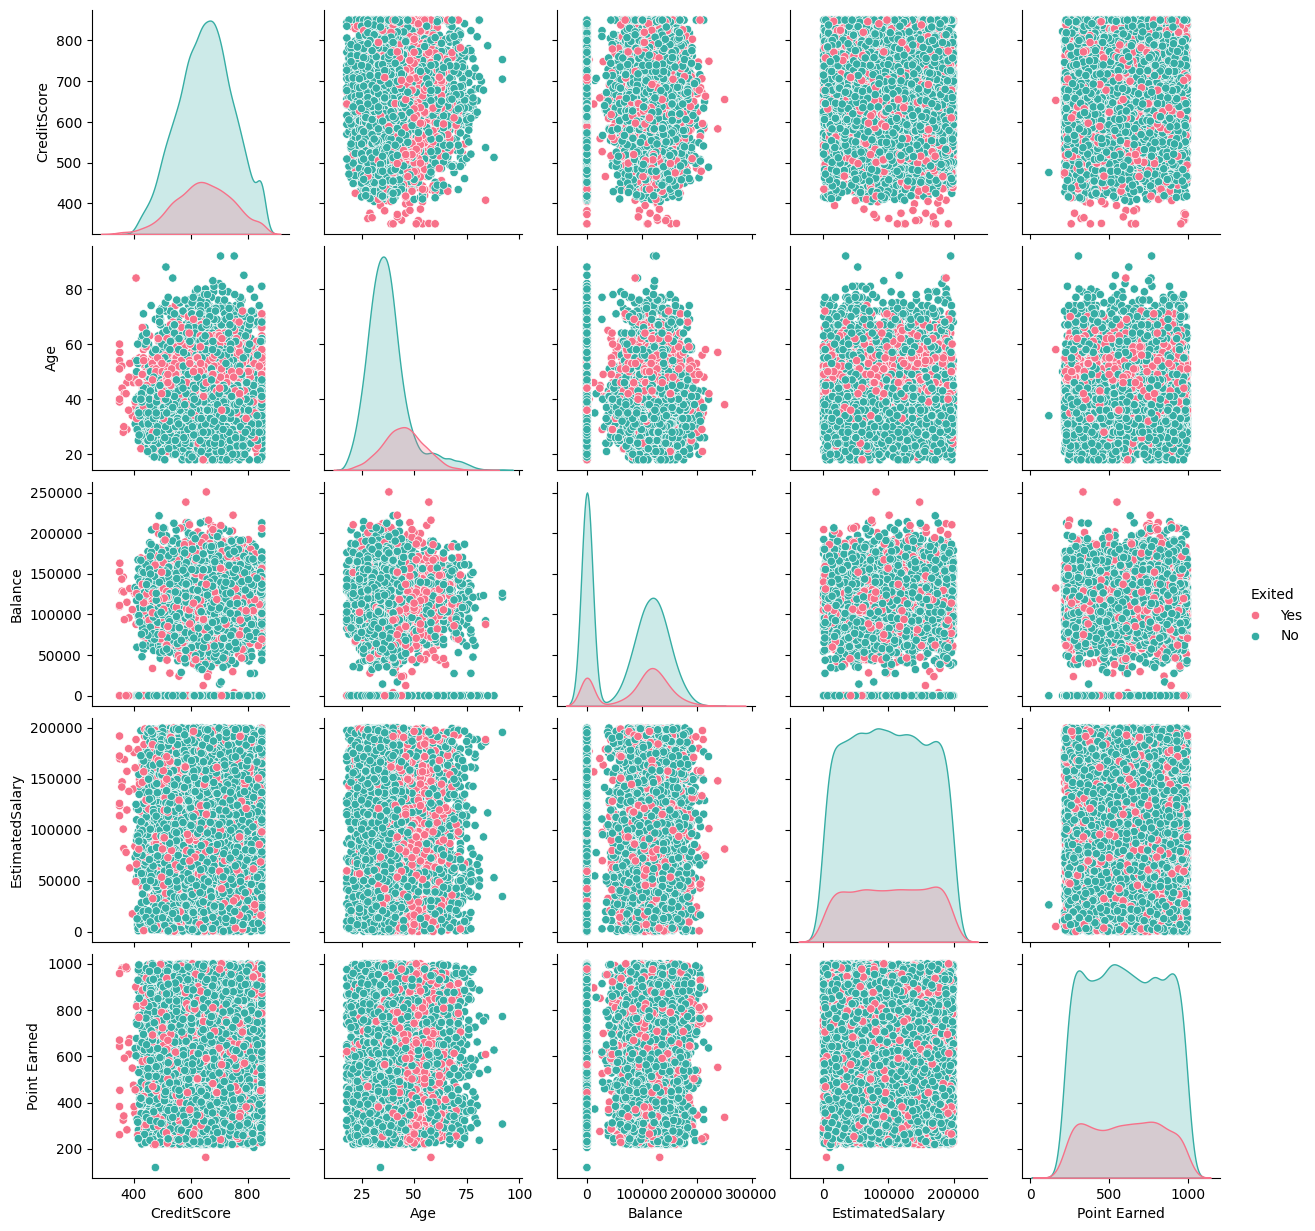

In [41]:
df_p = df.copy()
df_p = df_p.drop(['Tenure', 'NumOfProducts', 'Satisfaction Score', 'Geography', 'Gender',
           'Card Type', 'HasCrCard', 'IsActiveMember', 'Complain' ], axis = 1)

df_p["Exited"] = np.where(df_p["Exited"] == 0, "No", "Yes")
sns.pairplot(df_p, hue='Exited', palette='husl')

### Insights 
One thing that I instantly noticed is that people who have credit scores under 400 have also exited the bank, this is obvious to say the least, but it can be crucial for classification.

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Card Type'] = le.fit_transform(df['Card Type'])
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

print("\nUnique Values for Geography\n", df['Geography'].unique())
print("\nUnique Values for Gender\n", df['Gender'].unique())
print("\nUnique Values for Card Type\n", df['Card Type'].unique())


Unique Values for Geography
 [0 2 1]

Unique Values for Gender
 [0 1]

Unique Values for Card Type
 [0 1 3 2]


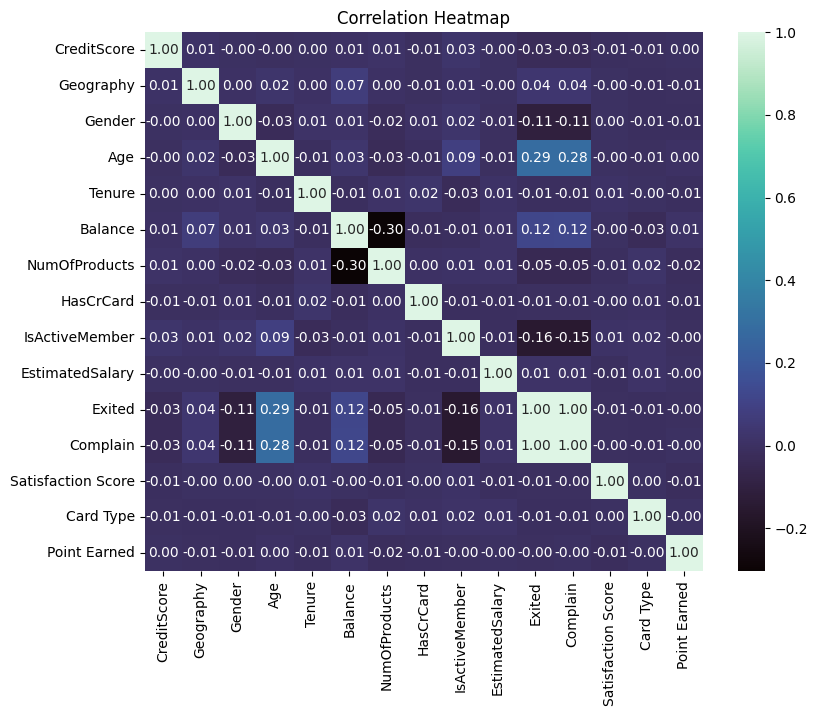

In [43]:
plt.figure(figsize=(9,7))

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="mako", fmt=".2f")

plt.title("Correlation Heatmap")

plt.show()

### Insights
Looking at this, there is a 100% correlation between complaints and churn. This is quite obvious, however, with a perfect correlation it can be quite controversal. It is worth noting that we don't know the when a customer has complained. This is because they may have complained after exiting the bank. Therefore it may be best to drop this feature.

In [44]:
df = df.drop(['Complain'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425


## Training

In [45]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [46]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [49]:
def model_test(model, X_train, X_test, y_train, y_test):
    # fitting the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #model metrics
    val_accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {val_accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    #ROC curve
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_curve(fper, tper)
    
    

In [50]:
from sklearn.preprocessing import StandardScaler
# here we are scaling the data for logisitic regression since
# logistic regression tends to be sensitive to uneven scales

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.8140

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.59      0.18      0.27       393

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000



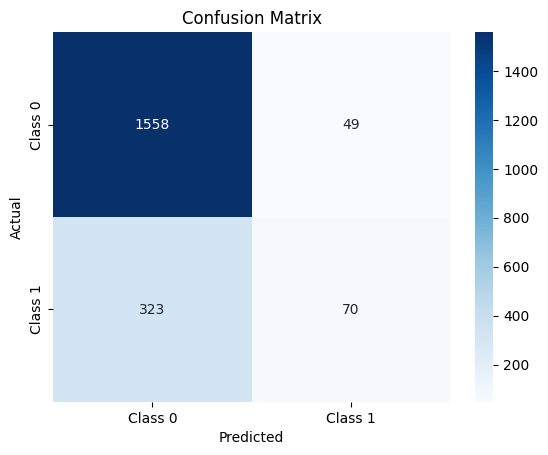

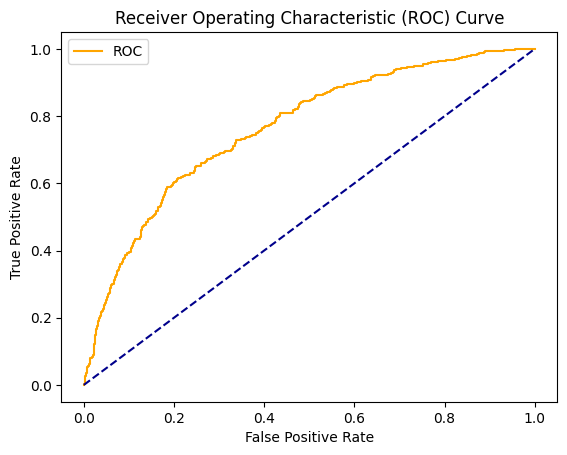


Logistic Regression Metrics: 
 None


In [51]:
log_model = LogisticRegression(random_state=42)
info = model_test(log_model, X_train_scaled, X_test_scaled, y_train, y_test)
print("\nLogistic Regression Metrics: \n", info)


Accuracy: 0.8650

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



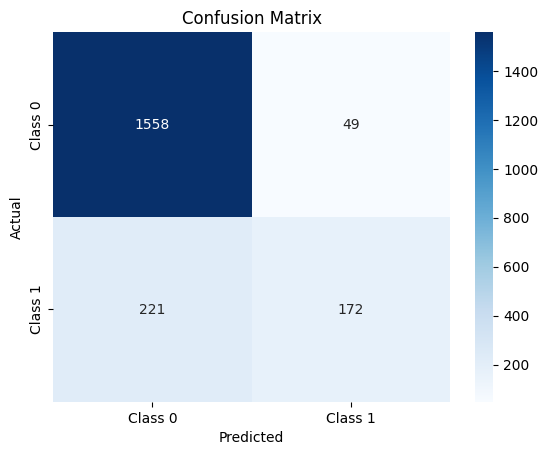

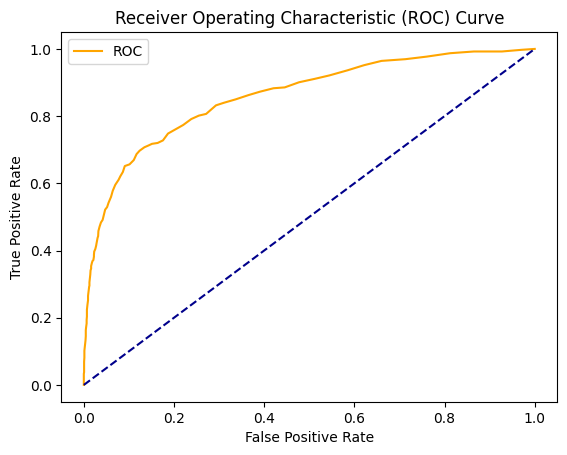


Random forest Classifier Metrics: 
 None


In [52]:
Random_model = RandomForestClassifier(random_state=42)
info = model_test(Random_model, X_train, X_test, y_train, y_test)
print("\nRandom forest Classifier Metrics: \n", info)

Accuracy: 0.8540

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.67      0.50      0.57       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000



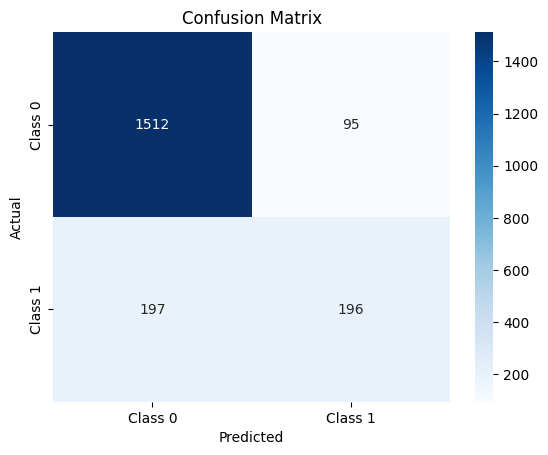

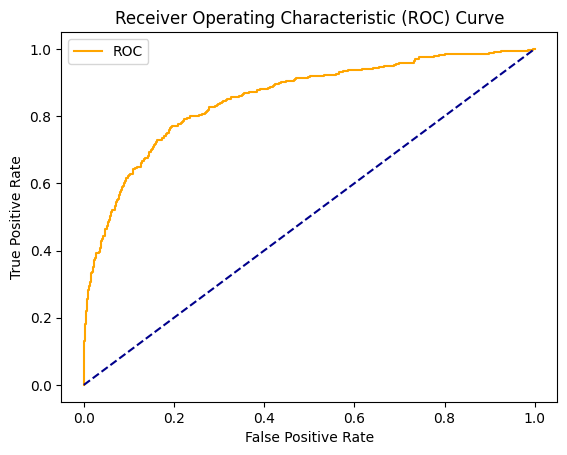


XGBoost Model Metrics: 
 None


In [53]:
xgb_model = xgb.XGBClassifier(random_state=42)
info = model_test(xgb_model, X_train, X_test, y_train, y_test)
print("\nXGBoost Model Metrics: \n", info)

### Insights
Looking at these models, the random forest model has the highest accuracy being 86%, therefore I want to focus on this model by trying to make it more accurate.

In [54]:
param_grid = [{
    'n_estimators': [100, 500, 1000],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [10, 20, 30]
}]

In [55]:
Random_model2 = RandomForestClassifier(random_state=42)
grid_search = RandomizedSearchCV(Random_model2, param_grid, n_iter=20, cv=5, random_state=42)
grid_search.fit(X_train, y_train)

best_random = grid_search.best_estimator_

#here are the best parameters for tuning:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 30}
Best Accuracy: 0.860125


In [56]:
y_pred = best_random.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.8615


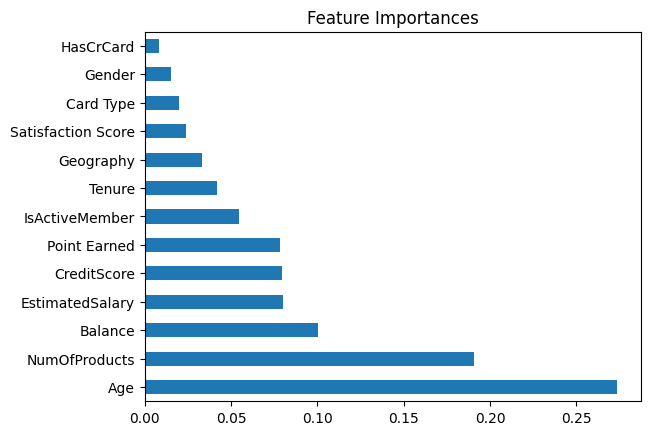

In [57]:
importances = best_random.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.plot(kind='barh')
plt.title('Feature Importances')
plt.show()


In [59]:
# Let use our existing data in order to use the model for prediction 
# (In a real life use case this would be new data, but for the sake of the project I'll reuse existing data)
df['Churn_Probability'] = best_random.predict_proba(X_new)[:, 1]
#df.head()
df.to_csv('customer_churn_scored.csv', index=False)

### Insights 
Looking at the feature importance gathered from the model, we can see that Age, Number of Products, and Balance are big indicators of churn. This is great because during the exploratory data analysis, I payed attention towards these metrics by looking at the visualizations that I made. This connection between feature importance and the data analysis that I did for customer churn shows that the model is aknowledging the features the way I did. 

## Summary
### What Does this Mean for the Bank?
Looking at the insights gathered we can make several conclusions that can allow for the bank to make data driven decisions. 

- Firstly, with churn data like this, it is important to not take account of customer complaints since it can affect our modeling and not being able to know when exaclty the customer has filed this complaint. This is because if the person filed the complaint after they have exited means that it isn't an accurate determinent of customer churn. However, not including this feature in the model doesnt mean that the bank shouldn't take in account of complaints because it is most correlated with customer churn. To decrease the rate of customer churn, the bank can look at complaints to determine what they can fix. Data Scientists can use this as an opportunity to utilize natural language processing (NLP) to figure out the most common complaint so that the bank (in this example) can prioritize this complaint while decreasing customer churn in the process.

- Secondly, with the exploratory data analysis and the feature importance metrics gathered from the model, we can determine that the most important indicators of customer churn is age, number of products and balance. This allows us to narrow down as to what exaclty is causing customer churn and to create strategies so that we can prevent it. For instance, age is the top indicator of customer churn (in the EDA, churn tends to happens with middle age individuals) which means that banks may need to implement strategies to retain the middle age group.

- Lastly, given our random forest model that garnered a ~86% accuracy, we can deploy this model to predict customer churn on existing customers. While the model achieves ~86% accuracy, it is important to monitor its performance on new data to ensure it generalizes well over time. Next steps could include integrating this model into a customer relationship management (CRM) system to flag high-risk customers for proactive outreach.

By leveraging this model and supporting insights, the bank can make more data-informed decisions to reduce churn, improve customer experience, and drive long-term business growth.
